## A neural net for regression

Use California housing price dataset for this notebook. 

The goal is to predict the price of houses in a district (a census block) given some stats about that district.

In [0]:
# Import Packages
import matplotlib as mpl
import matplotlib.pyplot as plt
import numpy as np
import os
import pandas as pd
import sklearn
import sys
import tensorflow as tf
from tensorflow import keras  # tf.keras
import time

### 1)
Load the California housing dataset using `sklearn.datasets.fetch_california_housing`. This returns an object with a `DESCR` attribute describing the dataset, a `data` attribute with the input features, and a `target` attribute with the labels. The goal is to predict the price of houses in a district (a census block) given some stats about that district. This is a regression task (predicting values).

In [0]:
from sklearn.datasets import fetch_california_housing
housing = fetch_california_housing()

In [0]:
print(housing.DESCR)

.. _california_housing_dataset:

California Housing dataset
--------------------------

**Data Set Characteristics:**

    :Number of Instances: 20640

    :Number of Attributes: 8 numeric, predictive attributes and the target

    :Attribute Information:
        - MedInc        median income in block
        - HouseAge      median house age in block
        - AveRooms      average number of rooms
        - AveBedrms     average number of bedrooms
        - Population    block population
        - AveOccup      average house occupancy
        - Latitude      house block latitude
        - Longitude     house block longitude

    :Missing Attribute Values: None

This dataset was obtained from the StatLib repository.
http://lib.stat.cmu.edu/datasets/

The target variable is the median house value for California districts.

This dataset was derived from the 1990 U.S. census, using one row per census
block group. A block group is the smallest geographical unit for which the U.S.
Census Bur

In [0]:
housing.data.shape

(20640, 8)

In [0]:
housing.target.shape

(20640,)

### 2)
Split the dataset into a training set, a validation set and a test set using Scikit-Learn's `sklearn.model_selection.train_test_split()` function.

In [0]:
from sklearn.model_selection import train_test_split

X_train_full, X_test, y_train_full, y_test = train_test_split(housing.data, housing.target, random_state=42)
X_train, X_valid, y_train, y_valid = train_test_split(X_train_full, y_train_full, random_state=42)

In [0]:
len(X_train), len(X_valid), len(X_test)

(11610, 3870, 5160)

### 3)
Scale the input features (e.g., using a `sklearn.preprocessing.StandardScaler`). Once again, don't forget that you should not fit the validation set or the test set, only the training set.

In [0]:
from sklearn.preprocessing import StandardScaler
#define scaler
scaler = ...
#use the scaler to fit and transform X_train
X_train_scaled = scaler....
#use the scaler to transform X_valid
X_valid_scaled = scaler....
#use the scaler to transform X_test
X_test_scaled = scaler....

### 4)
Now build, train and evaluate a neural network to tackle this problem. Then use it to make predictions on the test set.

**Tips**:
* Since you are predicting a single value per district (the median house price), there should only be one neuron in the output layer.
* Usually for regression tasks you don't want to use any activation function in the output layer (in some cases you may want to use `"relu"` or `"softplus"` if you want to constrain the predicted values to be positive, or `"sigmoid"` or `"tanh"` if you want to constrain the predicted values to 0-1 or -1-1).
* A good loss function for regression is generally the `"mean_squared_error"` (aka `"mse"`). When there are many outliers in your dataset, you may prefer to use the `"mean_absolute_error"` (aka `"mae"`), which is a bit less precise but less sensitive to outliers.

In [0]:
model = keras.models.Sequential([
    keras.layers.Dense(...., activation="relu", input_shape=X_train.shape[1:]), #set 30 units
    keras.layers.Dense(....)  #set 1 unit as output (because this is regression)
])
model.compile(loss="mean_squared_error", optimizer=keras.optimizers.SGD(....)) #set 1e-3 as learning rate

Instructions for updating:
If using Keras pass *_constraint arguments to layers.


In [0]:
callbacks = [keras.callbacks.EarlyStopping(patience=....)] #set 10 as the patience
history = model.fit(X_train_scaled, y_train,
                    validation_data=(X_valid_scaled, y_valid), epochs=...., #set 100 epochs
                    callbacks=callbacks)

Train on 11610 samples, validate on 3870 samples
Epoch 1/100
11610/11610 [==============================] - 1s 81us/sample - loss: 1.6899 - val_loss: 6.2377
Epoch 2/100
11610/11610 [==============================] - 1s 46us/sample - loss: 0.6910 - val_loss: 0.6059
Epoch 3/100
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5861 - val_loss: 0.5287
Epoch 4/100
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5509 - val_loss: 0.5005
Epoch 5/100
11610/11610 [==============================] - 1s 45us/sample - loss: 0.5264 - val_loss: 0.4793
Epoch 6/100
11610/11610 [==============================] - 1s 44us/sample - loss: 0.5083 - val_loss: 0.4648
Epoch 7/100
11610/11610 [==============================] - 0s 43us/sample - loss: 0.4939 - val_loss: 0.4522
Epoch 8/100
11610/11610 [==============================] - 1s 45us/sample - loss: 0.4820 - val_loss: 0.4550
Epoch 9/100
11610/11610 [==============================] - 0s 42us/sample - loss: 0.474

#Evaluate the model

In [0]:
model.evaluate(...., y_test) #should you put X_test or X_test_scaled here? Why?

5160/5160 [==============================] - 0s 23us/sample - loss: 0.3915


0.39151506590288737

#Predict for new values - X_test_scaled

In [0]:
model.predict(....) #should you put X_test or X_test_scaled here? Why?

array([[0.6065943],
       [1.6612711],
       [3.5289097],
       ...,
       [1.3825657],
       [2.4954164],
       [3.823466 ]], dtype=float32)

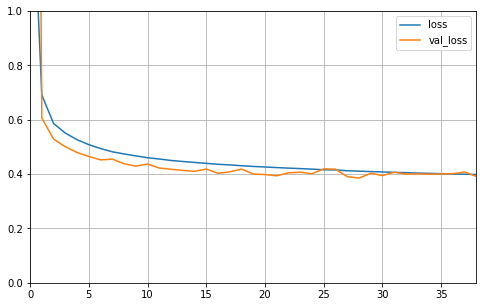

In [0]:
def plot_learning_curves(history):
    pd.DataFrame(history.history).plot(figsize=(8, 5))
    plt.grid(True)
    plt.gca().set_ylim(0, 1)
    plt.show()
    
plot_learning_curves(history)

![Exercise solution](https://camo.githubusercontent.com/250388fde3fac9135ead9471733ee28e049f7a37/68747470733a2f2f75706c6f61642e77696b696d656469612e6f72672f77696b6970656469612f636f6d6d6f6e732f302f30362f46696c6f735f736567756e646f5f6c6f676f5f253238666c69707065642532392e6a7067)